# TENTE DEIXAR OS GRÁFICOS MELHORES, USANDO O BOKEH OU MATPLOTLIB E VERIFICA SE A TABELA ANOVA TÁ CORRETA, RODE ESSE PROGRAMA PARA ALGUM PROBLEMA DO LIVRO QUE TENHA RESPOSTA

In [1]:
# importando as bibliotecas

# módulo para análise de dados
import pandas as pd

# módulo para uso de vetores de alto desempenho
import numpy as np

# módulos de visualização
import matplotlib.pyplot as plt
import matplotlib as mpl

# módulo de estatística
from scipy import stats
from statistics import variance

# comando "mágico" para imprimir gráficos dentro do próprio jupyter notebook
%matplotlib inline

In [2]:
# carregando o arquivo em um dataframe
file = "../Dado_modificado/data3.txt"
dados = pd.read_csv(file, sep=' ', names=['x','y'])

In [3]:
# mostrando os dados
dados.head()

,x,y
0,614.537395,60.517483
1,758.844735,71.533296
2,459.164127,49.030999
3,5.648059,-5.624030
4,282.525419,21.568456


In [4]:
# transformando a séries de dados em arrays
x = np.array(dados.x)
y = np.array(dados.y)

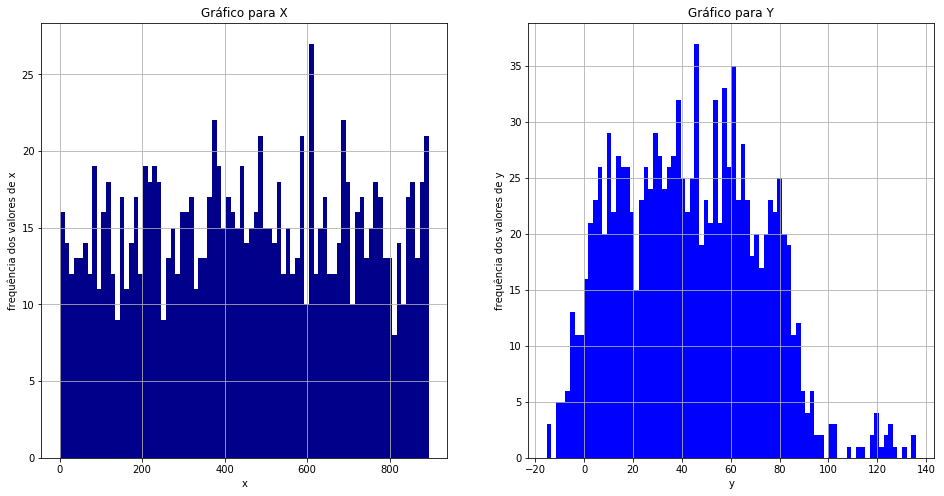

In [5]:
# subplots retorna uma figura e os axis para plotar mais de um gráfico
fig, ax = plt.subplots(1,2, figsize=(16,8))

#-------------------------------------------------------------------------------------------------------------------------
# PLOTAGEM DE DADOS PARA X
dados['x'].hist(ax=ax[0], color='darkBlue', bins=80)
ax[0].set_title("Gráfico para X")
ax[0].set_xlabel("x")
ax[0].set_ylabel('frequência dos valores de x')

#-------------------------------------------------------------------------------------------------------------------------
# PLOTAGEM DE DADOS PARA Y
dados['y'].hist(ax=ax[1], color='Blue', bins=80)
ax[1].set_title("Gráfico para Y")
ax[1].set_xlabel("y")
ax[1].set_ylabel('frequência dos valores de y')
plt.show()

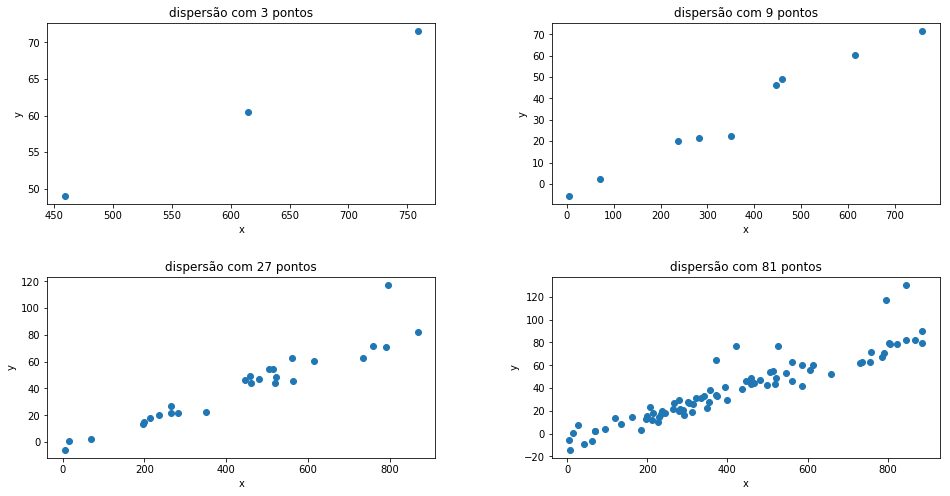

In [6]:
fig, ax = plt.subplots(2,2, figsize=(16,8))
n = 3

#-------------------------------------------------------------------------------------------------------------------------
ax[0][0].scatter(x[0:n],y[0:n])
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[0][0].set_title('dispersão com %d pontos' %n)

#-------------------------------------------------------------------------------------------------------------------------
n1 = n*3
ax[0][1].scatter(x[0:n1],y[0:n1])
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('y')
ax[0][1].set_title('dispersão com %d pontos' %n1)

#-------------------------------------------------------------------------------------------------------------------------
n2 = n1*3
ax[1][0].scatter(x[0:n2],y[0:n2])
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][0].set_title('dispersão com %d pontos' %n2)

#-------------------------------------------------------------------------------------------------------------------------
n3 = n2*3
ax[1][1].scatter(x[0:n3],y[0:n3])
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')
ax[1][1].set_title('dispersão com %d pontos' %n3)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

In [23]:
# calculando o coeficiente de correlação
R = np.corrcoef(dados.x,dados.y)[0,1]
print("coeficiente de correlação %.2f " %R)

coeficiente de correlação 0.94 


In [14]:
# método dos mínimos quadrados
def numerador(x,y):
    mediax = x.mean()
    mediay = y.mean()
    n = len(x)
    somatorio = 0
    for i in range(0,n,1):
        somatorio = somatorio + (x[i] - mediax)*(y[i] - mediay)
    return somatorio

def denominador(x):
    mediax = x.mean()
    n = len(x)
    dnum = 0
    for i in range(0,n,1):
        dnum = dnum + (x[i] - mediax)**2
    return dnum

def estimador_leastSquare(y, y_otimo):
    n = len(y)
    somatorio = 0
    for i in range(0,len(y),1):
        somatorio = somatorio + ((y[i] - y_otimo[i])**2)
    somatorio = somatorio/(n-2)
    return somatorio

In [20]:
# parâmetro b1 da reta dos mínimos quadrados
b1 = numerador(x,y)/denominador(x)

# parâmetro b0 da reta dos mínimos quadrados
b0 = y.mean() - b1*x.mean()

# y da reta dos mínimos quadrados
y_otimo = b1*x + b0

# variância da reta dos mínimos quadrados
Estimador_leastSquare = estimador_leastSquare(y, y_otimo)

In [10]:
print("y = %.4f + %.4f*x" %(b0,b1))

y = -4.1842 + 0.1045*x


In [26]:
print("variância da reta: %.2f" %Estimador_leastSquare)

variância da reta: 90.03


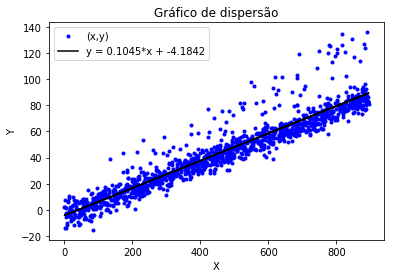

In [28]:
# gráfico de dispersão yx

tamanho = len(x) # tamanho máximo

plt.plot(dados.x.head(tamanho),dados.y.head(tamanho),'.',color='b', label="(x,y)")
plt.plot(x[0:tamanho], (b1*(x[0:tamanho]) + b0), color='black', label="y = %.4f*x + %.4f" %(b1,b0))
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Gráfico de dispersão")
plt.show()

In [19]:
residuo = sum(y - y_otimo) # resíduo deu muito próximo de zero, mas ele não deu zero devido ao erro de arrendondamento
print(residuo)

1.872280108727864e-12


In [35]:
# tamanho dos dados
N = dados.shape[0]

# alfa fornecido 
alfa = 0.05

# valor da distribuição F obtido da tabela. 1 grau de liberdade no numerador e N-2 no denominador para alfa
F_tabela = 3.84

In [38]:
def SQREG(y,y_otimo):
    media = y.mean()
    soma = 0
    for i in range(0,len(y),1):
        soma = soma + (y_otimo[i] - media)**2
    return soma

def SQE(y,y_otimo):
    media = y.mean()
    soma = 0
    for i in range(0,len(y)):
        soma = soma + (y[i] - y_otimo[i])**2
    return soma

# variáveis para tabela ANOVA
SQreg = SQREG(y,y_otimo)
sqe = SQE(y,y_otimo)
SQT = sqe + SQreg

# F de fisher
F0 = SQreg/(sqe/(N-2))

In [49]:
if(F0 > F_tabela):
    print("rejeito a hipótese nula pois (F0 = %.2f) > (F = %.2f)" %(F0,F_tabela))
else:
    print("não rejeito a hipótese nula pois (F0 = %.2f) <= (F = %.2f)" %(F0,F_tabela))

rejeito a hipótese nula pois (F0 = 9529.94) > (F = 3.84)


# ===========================FIM=================================